<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Predador_presa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cálculo Numérico**

José Claudinei Ferreira

Universidade Federal de Alfenas

#**O sistema predador-presa**

Vamos considerar o sistema de equações da forma
$$\begin{cases} \frac{dx}{dt}&=&\alpha x-\beta xy\\\\
   \frac{dy}{dt}&=&\delta xy-\gamma y\\\\x(t_0)&=&x_0\\\\y(t_0)&=&y_0\end{cases},$$ em que $\alpha,\,\beta,\,\delta,\,\gamma$ são números reais positivos conhecidos e $t_0,\,x_0,\,y_0$ são números reais conhecidos.

Essa equação pode ser usada em estudos bastante simples sobre a [itereção entre duas espécies, em que uma se alimenta da outra](https://parajovens.unesp.br/o-circulo-da-vida-a-matematica-das-relacoes-entre-predador-e-presa/).



A ideia é a seguinte:

1. A quantidade $x$ de uma espécie muda ao longo do tempo $t$. Essa mudança é devida a nascimentos e mortes naturais, que supõe-se expressa por $\alpha x$. Há também o fato de membros da espécie $x$ serem devorados por membros da espécie $y$, que supõe-se que a variação de $x$ devida a isso possa ser expressa por $\beta xy$.

2. A quantidade $y$ de uma espécie muda ao longo do tempo $t$. Essa mudança é devida a nascimentos e mortes naturais, que supõe-se expressa por $\delta x$. Há também o fato de membros da espécie $y$ alimentarem-se de membros da espécie $x$, que supõe-se que a variação de $y$ devida a isso possa ser expressa por $\gamma xy$.

**Exemplo:** Supondo que $\alpha=0.1,\,\beta=0.01,\,\delta=0.001,\,\gamma=0.01,\,x_0=1000,\,y_0=20,\,t_0=0$, temos a equação
$$\begin{cases} \frac{dx}{dt}&=&\frac{1}{10}x-\frac{1}{100}xy\\\\
   \frac{dy}{dt}&=&\frac{1}{1000} xy-\frac{1}{100} y\\\\x(t_0)&=&x_0\\\\y(t_0)&=&y_0\end{cases},$$ em que supomos que $x$ é a quantidade de lebres em uma floresta e $y$ é a quantidade de raposas nesta floresta. Contamos o tempo $t$ em meses.

Vejamos como definir em Python a função $F(t,(x(t),y(t)))=(x'(t),y'(t))$, ou $u'=F(t,u)$, em que $u(t)=(x(t),y(t))$.

In [5]:
import numpy as np
a,b,c,d=0.1,0.01,0.001,0.01

def F(u):
  x=u[0]
  y=u[1]
  dxdt=a*x-b*x*y
  dydt=c*x*y-d*y
  return np.array([dxdt,dydt])  # np.array([a,b]) transforma a lista [a,b] no vetor com os mesmo elementos.

Simulando com o método de Euler, para $n=10000$ e $h=0.0025$.

In [6]:
n=1000000
h=0.0025

u=[1000]     # Lebres no tempo 0.
v=[20]       # Raposas no tempo 0.

for i in range(1,n+1):
  k=h*F([u[i-1],v[i-1]])
  u.append(u[i-1]+k[0])
  v.append(v[i-1]+k[1])


Vejamos a curva aproximada $(x(t),y(t))$.

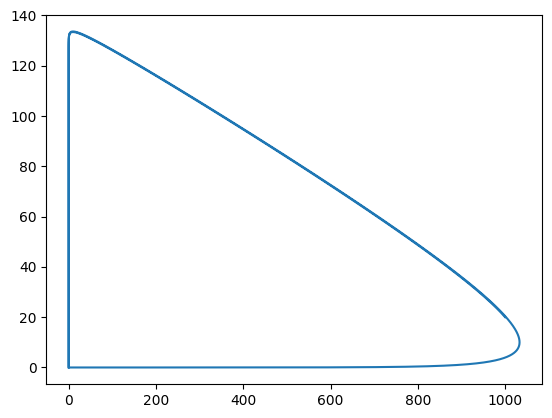

In [7]:
import matplotlib.pyplot as plt
plt.plot(u,v)
plt.show()

Vejamos agora o comportamento de $x(t)$ e de $y(t)$.

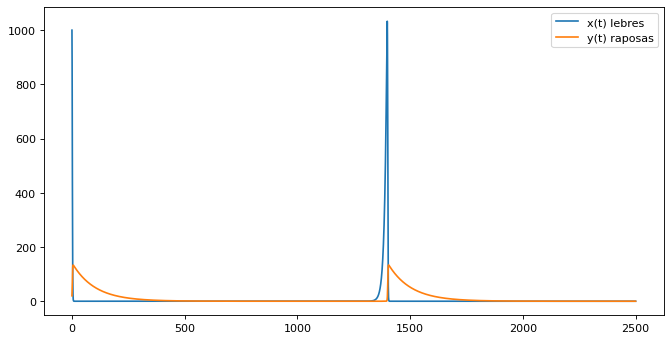

In [9]:
t=np.linspace(0,n*h,n+1)     # Cria uma lista (vetor) de números entre 0 e nh, igualmente espaçados.

fig=plt.figure(figsize=(10,5),dpi=80)
plt.plot(t,u)
plt.plot(t,v)
plt.legend(['x(t) lebres','y(t) raposas'])
plt.show()

**Obs:** Os dados adequados para um modelo podem ser aproximados por meio de dado reais, o que não foi feito aqui.